In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
import re
from string import punctuation
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [15,10]
pd.set_option('max_columns', 100)

In [93]:
train_df = pd.read_csv('/input/nfl-big-data-bowl-2020/train.csv', dtype={'WindSpeed': 'object'})

In [94]:
train_df.head(100)

GameId          PlayId  Team      X      Y     S     A   Dis  \
0   2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1   2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2   2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3   2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4   2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   
..         ...             ...   ...    ...    ...   ...   ...   ...   
95  2017090700  20170907000395  away  36.19  10.91  1.54  1.14  0.29   
96  2017090700  20170907000395  away  34.18  24.54  2.96  1.64  0.31   
97  2017090700  20170907000395  away  33.80  37.41  2.56  1.47  0.49   
98  2017090700  20170907000395  away  29.99  27.12  3.90  2.53  0.44   
99  2017090700  20170907000395  home  35.70  36.00  0.96  3.26  0.00   

    Orientation     Dir    NflId      DisplayName  JerseyNumber  Season  \
0         81.99  177.18   496723       Eric Berry            29    2017   
1         27.61  198.70  2495116     Allen Bailey            97    2017   
2          3.01  202.73  2495493   Justin Houston            50    2017   
3        359.77  105.64  2506353  Derrick Johnson            56    2017   
4         12.63  164.31  2530794       Ron Parker            38    2017   
..          ...     ...      ...              ...           ...     ...   
95       341.17   90.11  2552652     Chris Conley            17    2017   
96        64.39  172.91  2552668      Mitch Morse            61    2017   
97       352.54   43.82  2554630      Ross Travis            88    2017   
98        34.27  157.92  2557917      Kareem Hunt            27    2017   
99       160.43  172.71    71251    Patrick Chung            23    2017   

    YardLine  Quarter GameClock PossessionTeam  Down  Distance FieldPosition  \
0         35        1  14:14:00             NE     3         2            NE   
1         35        1  14:14:00             NE     3         2            NE   
2         35        1  14:14:00             NE     3         2            NE   
3         35        1  14:14:00             NE     3         2            NE   
4         35        1  14:14:00             NE     3         2            NE   
..       ...      ...       ...            ...   ...       ...           ...   
95        25        1  12:08:00             KC     1        10            KC   
96        25        1  12:08:00             KC     1        10            KC   
97        25        1  12:08:00             KC     1        10            KC   
98        25        1  12:08:00             KC     1        10            KC   
99        25        1  12:08:00             KC     1        10            KC   

    HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher OffenseFormation  \
0                     0                       0      2543773          SHOTGUN   
1                     0                       0      2543773          SHOTGUN   
2                     0                       0      2543773          SHOTGUN   
3                     0                       0      2543773          SHOTGUN   
4                     0                       0      2543773          SHOTGUN   
..                  ...                     ...          ...              ...   
95                    7                       0      2557917          SHOTGUN   
96                    7                       0      2557917          SHOTGUN   
97                    7                       0      2557917          SHOTGUN   
98                    7                       0      2557917          SHOTGUN   
99                    7                       0      2557917          SHOTGUN   

    OffensePersonnel  DefendersInTheBox  DefensePersonnel PlayDirection  \
0   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
1   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
2   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
3   1 RB

In [95]:
games = train_df['GameId'].nunique()
plays = train_df['PlayId'].nunique()
print('Game: {} and Play: {}'.format(games, plays))

Game: 512 and Play: 23171


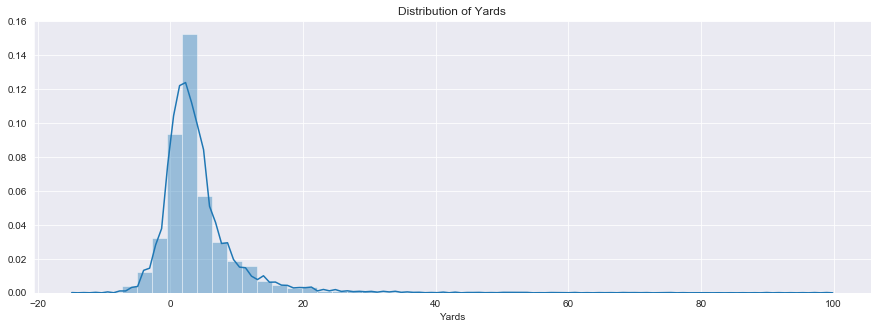

In [96]:
fig, _ = plt.subplots(figsize=(15, 5))
sns.distplot(train_df['Yards'])
plt.title('Distribution of Yards')
plt.show()

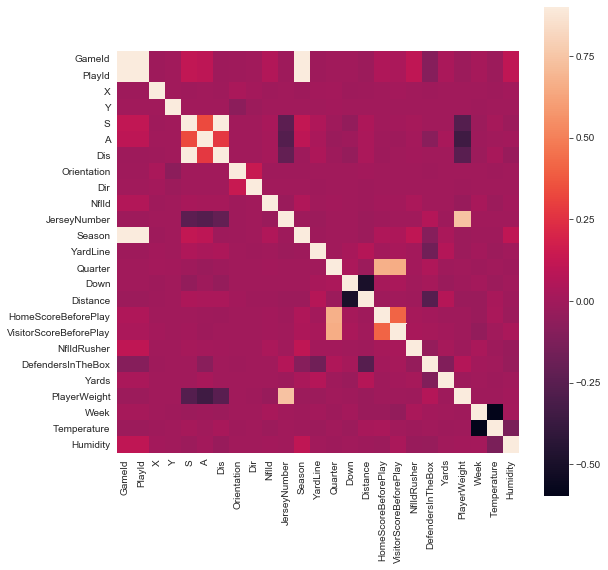

In [97]:
fig, _ = plt.subplots(figsize=(9, 9))
corr = train_df.corr()
sns.heatmap(corr, vmax=0.9, square=True)
plt.show()

In [98]:
missing = train_df.isnull().sum() / len(train_df) * 100
missing = missing.drop(missing[missing == 0].index).sort_values(ascending=False)
missing_ratio = pd.DataFrame({'Missing': missing})
missing_ratio.head(20)

Missing
WindDirection      15.739502
WindSpeed          13.227742
Temperature         9.520521
GameWeather         8.562427
StadiumType         6.460662
FieldPosition       1.260196
Humidity            1.208407
OffenseFormation    0.021579
DefendersInTheBox   0.012947
Orientation         0.003531
Dir                 0.002746

In [99]:
train_df['WindDirection'].unique()

array(['SW', 'NNE', 'SE', 'East', nan, 'NE', 'North', 'S', 'Northwest',
       'SouthWest', 'ENE', 'ESE', 'SSW', 'NW', 'Northeast', 'From S', 'W',
       'South', 'West-Southwest', 'E', '13', 'N', 'NNW',
       'South Southeast', 'SSE', 'West', 'WSW', 'From SW', 'WNW', 's',
       'NorthEast', 'from W', 'W-NW', 'South Southwest', 'Southeast',
       'From WSW', 'West Northwest', 'Calm', 'From SSE', 'From W',
       'East North East', 'From ESE', 'EAST', 'East Southeast',
       'From SSW', '8', 'North East', 'Southwest', 'North/Northwest',
       'From NNE', '1', 'N-NE', 'W-SW', 'From NNW'], dtype=object)

In [100]:
train_df['WindDirection_p'] = train_df['WindDirection'].apply(lambda x: ''.join([c for c in x if c not in punctuation]).lower() \
                                                         .replace('north', 'n') \
                                                         .replace('east', 'e') \
                                                         .replace('south', 's') \
                                                         .replace('west', 'w') \
                                                         .replace('from', '') \
                                                         .replace(' ', '') if not pd.isna(x) else x)

In [101]:
train_df['WindDirection_p'].unique()

array(['sw', 'nne', 'se', 'e', nan, 'ne', 'n', 's', 'nw', 'ene', 'ese',
       'ssw', 'w', 'wsw', '13', 'nnw', 'sse', 'wnw', 'calm', '8', '1'],
      dtype=object)

In [102]:
def transform_WindDirection(txt):
    if pd.isna(txt):
        return np.nan
    
    if txt=='n' or txt=='0':
        return 0
    if txt=='nne' or txt=='nen' or txt=='1':
        return 1/8
    if txt=='ne' or txt=='2':
        return 2/8
    if txt=='ene' or txt=='nee' or txt=='3':
        return 3/8
    if txt=='e' or txt=='4':
        return 4/8
    if txt=='ese' or txt=='see' or txt=='5':
        return 5/8
    if txt=='se' or txt=='6':
        return 6/8
    if txt=='ses' or txt=='sse' or txt=='7':
        return 7/8
    if txt=='s' or txt=='8':
        return 8/8
    if txt=='ssw' or txt=='sws' or txt=='9':
        return 9/8
    if txt=='sw' or txt=='10':
        return 10/8
    if txt=='sww' or txt=='wsw' or txt=='11':
        return 11/8
    if txt=='w' or txt=='12':
        return 12/8
    if txt=='wnw' or txt=='nww' or txt=='13':
        return 13/8
    if txt=='nw' or txt=='14':
        return 14/8
    if txt=='nwn' or txt=='nnw' or txt=='15':
        return 15/8
    return np.nan

In [103]:
train_df['WindDirection_p'] = train_df['WindDirection_p'].apply(transform_WindDirection)

In [104]:
train_df['WindDirection_p'].value_counts()

1.000    48730
0.000    40370
0.250    38214
1.500    37532
1.250    33638
1.750    31306
0.750    27720
1.375    27522
0.125    23496
1.625    22814
1.125    21736
0.500    21076
1.875    15928
0.875    15202
0.625    11638
0.375    11550
Name: WindDirection_p, dtype: int64

In [105]:
train_df['WindSpeed'].unique()

array(['8', '6', '10', '9', '11', nan, '7', '5', '2', '12', '1', '3', '4',
       '13', '0', 'SSW', '14', '15', '17', '18', '16', '11-17', '23',
       '14-23', '13 MPH', '24', '12-22', '4 MPh', '15 gusts up to 25',
       '10MPH', '10mph', '22', 'E', '7 MPH', 'Calm', '6 mph', '19', 'SE',
       '20', '10-20', '12mph'], dtype=object)

In [106]:
def clean_WindSpeed(x):
    if pd.isna(x):
        return np.nan
    x = x.lower()
    x = x.replace('mph', '').strip()
    if '-' in x:
        return (int(x.split('-')[0]) + int(x.split('-')[1]))/2
    if 'gusts up to' in x:
        return (int(x.split()[0]) + int(x.split()[-1]))/2 
    return x

In [107]:
train_df['WindSpeed_p'] = train_df['WindSpeed'].apply(clean_WindSpeed)

In [108]:
train_df['WindSpeed_p'].unique()

array(['8', '6', '10', '9', '11', nan, '7', '5', '2', '12', '1', '3', '4',
       '13', '0', 'ssw', '14', '15', '17', '18', '16', 14.0, '23', 18.5,
       '24', 17.0, 20.0, '22', 'e', 'calm', '19', 'se', '20', 15.0],
      dtype=object)

In [109]:
def str_to_float(x):
    try:
        return float(x)
    except:
        return -1

In [110]:
train_df['WindSpeed_p'] = train_df['WindSpeed_p'].apply(str_to_float)

In [111]:
train_df['WindSpeed_p'].value_counts()

 5.0     53284
 6.0     42614
 7.0     40678
 4.0     35486
 10.0    31592
 9.0     31328
 8.0     29370
 3.0     26862
 12.0    24552
 2.0     24112
 11.0    17116
 15.0    15026
 0.0     13772
 1.0     12078
 13.0    10208
 16.0     9878
 14.0     6820
 17.0     4928
-1.0      4202
 18.0     1980
 20.0     1848
 23.0     1166
 24.0      968
 18.5      968
 22.0      836
 19.0      660
Name: WindSpeed_p, dtype: int64

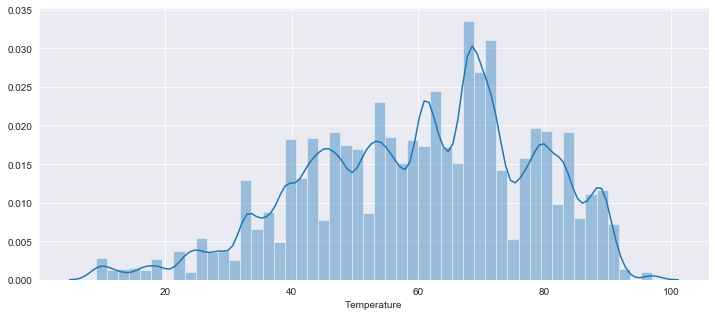

In [112]:
fig, _ = plt.subplots(figsize=(12, 5))
sns.distplot(train_df[~train_df['Temperature'].isnull()]['Temperature'])
plt.show()

In [113]:
miss_temp = train_df[train_df['Temperature'].isnull()]['GameId'].nunique()
print('{} Games missing Temperatrue data'.format(miss_temp))

49 Games missing Temperatrue data


In [114]:
train_df['Month'] = train_df['GameId'].apply(lambda x: str(x)[4:6])

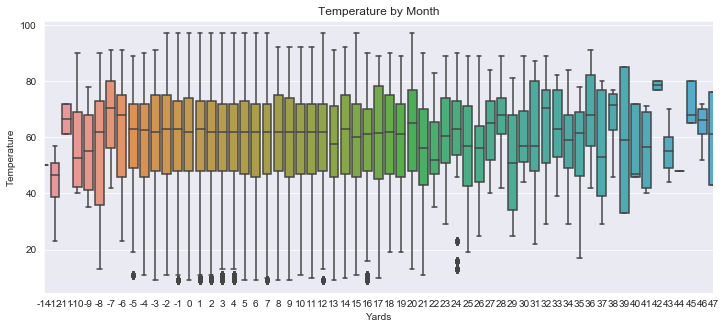

In [115]:
fig, _ = plt.subplots(figsize=(12, 5))
sns.boxplot(x=train_df['Yards'],
            y=train_df['Temperature'])
plt.title('Temperature by Month')
plt.xlim(0, 60)
plt.show()

## Team

In [116]:
train_df.query('PossessionTeam != HomeTeamAbbr & PossessionTeam != VisitorTeamAbbr')[['PossessionTeam', 'HomeTeamAbbr', 'VisitorTeamAbbr']]

PossessionTeam HomeTeamAbbr VisitorTeamAbbr
2992              BLT          CIN             BAL
2993              BLT          CIN             BAL
2994              BLT          CIN             BAL
2995              BLT          CIN             BAL
2996              BLT          CIN             BAL
...               ...          ...             ...
509669            ARZ          SEA             ARI
509670            ARZ          SEA             ARI
509671            ARZ          SEA             ARI
509672            ARZ          SEA             ARI
509673            ARZ          SEA             ARI

[63822 rows x 3 columns]

In [117]:
for x, y, z in zip(sorted(train_df['PossessionTeam'].unique()),
                   sorted(train_df['HomeTeamAbbr'].unique()), 
                   sorted(train_df['VisitorTeamAbbr'].unique())
                  ):
    if x != y and x != z:
        print(x, y, z)

ARZ ARI ARI
BLT BAL BAL
CLV CLE CLE
HST HOU HOU


In [118]:
train_df['PossessionTeam'] = train_df['PossessionTeam'].replace({'ARZ': 'ARI', 'BLT': 'BAL', 'CLV': 'CLE', 'HST': 'HOU'})

In [119]:
train_df['HomePosition'] = train_df['PossessionTeam'] == train_df['FieldPosition']

In [120]:
train_df['YardLeft'] = train_df.apply(lambda row: 100 - row['YardLine'] if row['PossessionTeam'] == row['FieldPosition'] else row['Yards'], axis=1)

## Offense/Defense Personnel

In [121]:
def OffensePersonnel_Split(x):
    dic = {'DB' : 0, 'DL' : 0, 'LB' : 0, 'OL' : 0, 'QB' : 0, 'RB' : 0, 'TE' : 0, 'WR' : 0}
    for xs in x.split(','):
        xss = xs.strip().split()
        dic[xss[1]] = int(xss[0])
    return dic

def DefensePersonnel_Split(x):
    dic = {'DB' : 0, 'DL' : 0, 'LB' : 0, 'OL' : 0}
    for xs in x.split(','):
        xss = xs.strip().split()
        dic[xss[1]] = int(xss[0])
    return dic

In [122]:
temp = train_df['OffensePersonnel'].iloc[np.arange(0, len(train_df), 22)] \
    .apply(lambda x: pd.Series(OffensePersonnel_Split(x)))
temp.columns = ['Offense' + c for c in temp.columns]
temp['PlayId'] = train_df['PlayId'].iloc[np.arange(0, len(train_df), 22)]
train_df = train_df.merge(temp, on='PlayId')

In [123]:
temp = train_df['OffensePersonnel'].iloc[np.arange(0, len(train_df), 22)] \
    .apply(lambda x: pd.Series(DefensePersonnel_Split(x)))
temp.columns = ['Defense' + c for c in temp.columns]
temp['PlayId'] = train_df['PlayId'].iloc[np.arange(0, len(train_df), 22)]
train_df = train_df.merge(temp, on='PlayId')

## Stadium

In [124]:
train_df['StadiumType'].unique()

array(['Outdoor', 'Outdoors', 'Indoors', 'Retractable Roof', 'Indoor',
       'Retr. Roof-Closed', 'Open', nan, 'Indoor, Open Roof',
       'Retr. Roof - Closed', 'Outddors', 'Dome', 'Domed, closed',
       'Indoor, Roof Closed', 'Retr. Roof Closed',
       'Outdoor Retr Roof-Open', 'Closed Dome', 'Oudoor', 'Ourdoor',
       'Dome, closed', 'Retr. Roof-Open', 'Heinz Field', 'Outdor',
       'Retr. Roof - Open', 'Domed, Open', 'Domed, open', 'Cloudy',
       'Bowl', 'Outside', 'Domed'], dtype=object)

In [125]:
def clean_StadiumType(x):
    if pd.isna(x):
        return np.nan
    x = x.lower()
    x = ''.join([c for c in x if c not in punctuation]) 
    x = re.sub(' +', ' ', x)
    x = x.strip()
    if 'dome' in x:
        if 'open' in x:
            return 'domeopen'
        else:
            return 'indoor'
    x = x.replace('outdoors', 'outdoor')
    x = x.replace('oudoor', 'outdoor')
    x = x.replace('outddoors', 'outdoor')
    x = x.replace('ourdoor', 'outdoor')
    x = x.replace('outdor', 'outdoor')
    x = x.replace('ouside', 'outdoor')
    x = x.replace('indoors', 'indoor')
    x = x.replace('retractable', 'retr.')
    return x

def transform_StadiumType(x):
    if pd.isna(x):
        return np.nan
    if 'outdoor' in x or 'open' in x:
        return 1
    if 'indoor' in x or 'dome' in x:
        return 0
    return np.nan

In [126]:
train_df['StadiumType_p'] = train_df['StadiumType'].apply(clean_StadiumType)

In [127]:
train_df['StadiumType_p'].unique()

array(['outdoor', 'indoor', 'retr. roof', 'retr roofclosed', 'open', nan,
       'indoor open roof', 'retr roof closed', 'outddors',
       'indoor roof closed', 'outdoor retr roofopen', 'retr roofopen',
       'heinz field', 'retr roof open', 'domeopen', 'cloudy', 'bowl',
       'outside'], dtype=object)

In [128]:
train_df['StadiumType_p'] = train_df['StadiumType_p'].apply(transform_StadiumType)

In [129]:
train_df['StadiumType_p'].unique()

array([ 1.,  0., nan])

## Time

In [130]:
def strtosec(x):
    xs = x.split(':')
    xsec = int(xs[0]) * 60 + int(xs[1]) + int(xs[2]) / 60
    return xsec

In [131]:
train_df['TimeHandoff'] = train_df['TimeHandoff'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
train_df['TimeSnap'] = train_df['TimeSnap'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))
train_df['PlayTime'] = train_df.apply(lambda row: (row['TimeHandoff'] - row['TimeSnap']).total_seconds(), axis=1)



In [132]:
train_df['GameClock_p'] = train_df['GameClock'].apply(strtosec)
train_df['GameClock_p'] = train_df.apply(lambda row: (row['Quarter'] - 1) * 15 * 60 + row['GameClock_p'], axis=1)

secinyear = 3600*24*365.25
train_df['PlayerBirthDate'] = train_df['PlayerBirthDate'].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y"))
train_df['PlayerAge_p'] = train_df.apply(lambda row: (row['TimeHandoff'] - row['PlayerBirthDate']).total_seconds()/secinyear, axis=1)

In [133]:
train_df.head(11)

GameId          PlayId  Team      X      Y     S     A   Dis  \
0   2017090700  20170907000118  away  73.91  34.84  1.69  1.13  0.40   
1   2017090700  20170907000118  away  74.67  32.64  0.42  1.35  0.01   
2   2017090700  20170907000118  away  74.00  33.20  1.22  0.59  0.31   
3   2017090700  20170907000118  away  71.46  27.70  0.42  0.54  0.02   
4   2017090700  20170907000118  away  69.32  35.42  1.82  2.43  0.16   
5   2017090700  20170907000118  away  75.06  24.00  1.01  0.32  0.18   
6   2017090700  20170907000118  away  74.11  16.64  1.11  0.83  0.02   
7   2017090700  20170907000118  away  73.37  18.73  1.24  0.74  0.13   
8   2017090700  20170907000118  away  56.63  26.90  0.26  1.86  0.28   
9   2017090700  20170907000118  away  73.35  38.83  4.55  0.76  0.51   
10  2017090700  20170907000118  away  74.15  28.90  0.72  0.73  0.01   

    Orientation     Dir    NflId        DisplayName  JerseyNumber  Season  \
0         81.99  177.18   496723         Eric Berry            29    2017   
1         27.61  198.70  2495116       Allen Bailey            97    2017   
2          3.01  202.73  2495493     Justin Houston            50    2017   
3        359.77  105.64  2506353    Derrick Johnson            56    2017   
4         12.63  164.31  2530794         Ron Parker            38    2017   
5        308.34   95.01  2543494           Dee Ford            55    2017   
6        357.23  322.59  2543637  Terrance Mitchell            39    2017   
7        328.52  270.04  2543851     Phillip Gaines            23    2017   
8        344.70   55.31  2550257    Daniel Sorensen            49    2017   
9         75.47  190.84  2552488      Marcus Peters            22    2017   
10       342.58  274.14  2556369        Chris Jones            95    2017   

    YardLine  Quarter GameClock PossessionTeam  Down  Distance FieldPosition  \
0         35        1  14:14:00             NE     3         2            NE   
1         35        1  14:14:00             NE     3         2            NE   
2         35        1  14:14:00             NE     3         2            NE   
3         35        1  14:14:00             NE     3         2            NE   
4         35        1  14:14:00             NE     3         2            NE   
5         35        1  14:14:00             NE     3         2            NE   
6         35        1  14:14:00             NE     3         2            NE   
7         35        1  14:14:00             NE     3         2            NE   
8         35        1  14:14:00             NE     3         2            NE   
9         35        1  14:14:00             NE     3         2            NE   
10        35        1  14:14:00             NE     3         2            NE   

    HomeScoreBeforePlay  VisitorScoreBeforePlay  NflIdRusher OffenseFormation  \
0                     0                       0      2543773          SHOTGUN   
1                     0                       0      2543773          SHOTGUN   
2                     0                       0      2543773          SHOTGUN   
3                     0                       0      2543773          SHOTGUN   
4                     0                       0      2543773          SHOTGUN   
5                     0                       0      2543773          SHOTGUN   
6                     0                       0      2543773          SHOTGUN   
7                     0                       0      2543773          SHOTGUN   
8                     0                       0      2543773          SHOTGUN   
9                     0                       0      2543773          SHOTGUN   
10                    0                       0      2543773          SHOTGUN   

    OffensePersonnel  DefendersInTheBox  DefensePersonnel PlayDirection  \
0   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
1   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB          left   
2   1 RB, 1 TE, 3 WR                6.0  2 DL, 3 LB, 6 DB  